In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, ReLU
from keras_tuner.tuners import RandomSearch

from sklearn.metrics import mean_absolute_percentage_error

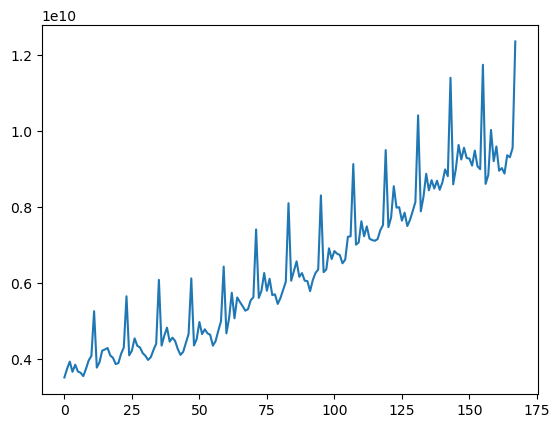

In [42]:
# numpyを使う
# ここでは元系列のまま分析を行う
series = np.loadtxt("../public/full_monthly_sales_without_header.csv")
plt.plot(series)
plt.show()

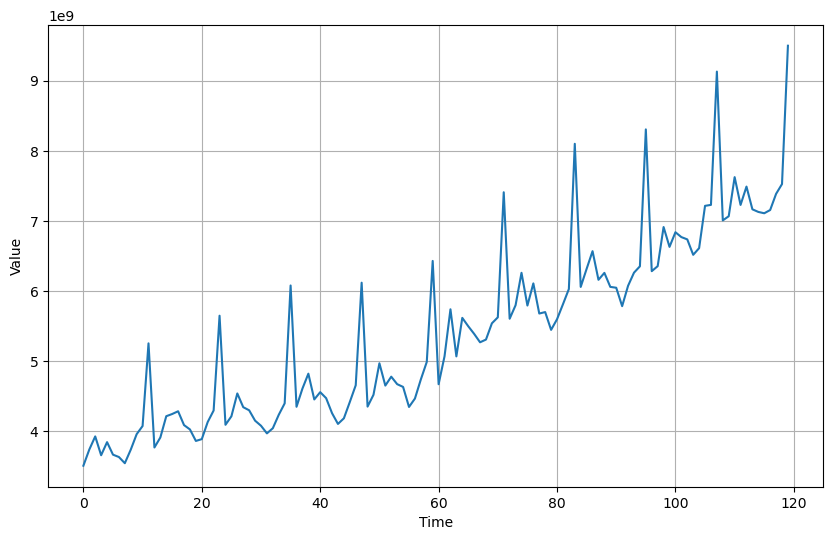

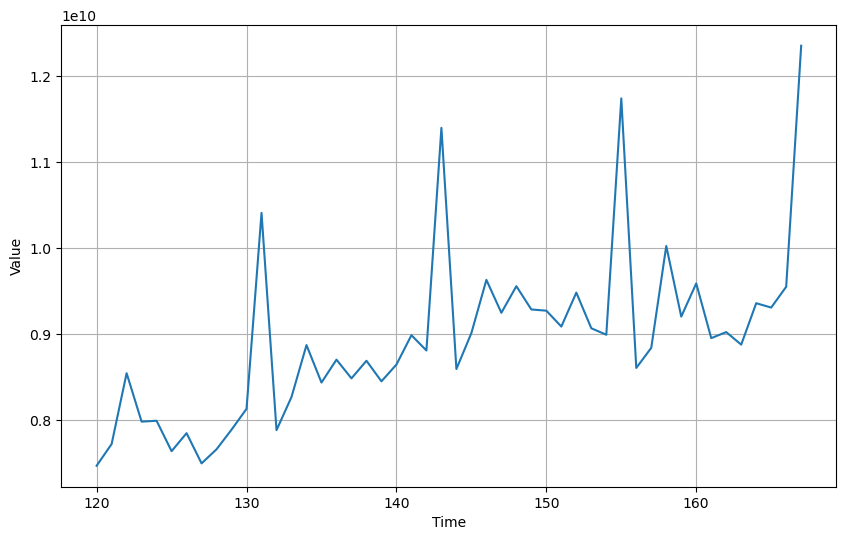

In [43]:
# 前半120時点を学習データ、以降を48時点を検証データとして分割

split_time = 120
time = np.arange(168, dtype="float32")

time_train = time[:split_time]
x_train = series[:split_time]
time_train_pred = time[20:split_time]
time_valid = time[split_time:168]
x_valid = series[split_time:168]

window_size = 20
batch_size = 20
shuffle_buffer_size = 1000

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train) # 学習セット
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid) # 検証セット
plt.show()

In [56]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [62]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 2s 44ms/step - loss: 108.8388
Epoch 2/500
5/5 [==============================] - 0s 17ms/step - loss: 108.2079
Epoch 3/500
5/5 [==============================] - 0s 19ms/step - loss: 107.6193
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 106.8461
Epoch 5/500
5/5 [==============================] - 0s 16ms/step - loss: 106.1449
Epoch 6/500
5/5 [==============================] - 0s 18ms/step - loss: 105.4634
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 104.9171
Epoch 8/500
5/5 [==============================] - 0s 14ms/step - loss: 104.2965
Epoch 9/500
5/5 [==============================] - 0s 22ms/step - loss: 103.6187
Epoch 10/500
5/5 [==============================] - 0s 13ms/step - loss: 103.0979
Epoch 11/500
5/5 [==============================] - 0s 15ms/step - loss: 102.6343
Epoch 12/500
5/5 [==============================] - 0s 15ms/step - loss: 102.1167
Epoch 13/500
5/5 [=======

5/5 [==============================] - 0s 13ms/step - loss: 94.6947
Epoch 102/500
5/5 [==============================] - 0s 11ms/step - loss: 94.9911
Epoch 103/500
5/5 [==============================] - 0s 11ms/step - loss: 94.8197
Epoch 104/500
5/5 [==============================] - 0s 12ms/step - loss: 94.6110
Epoch 105/500
5/5 [==============================] - 0s 11ms/step - loss: 94.2874
Epoch 106/500
5/5 [==============================] - 0s 11ms/step - loss: 94.2511
Epoch 107/500
5/5 [==============================] - 0s 11ms/step - loss: 94.0239
Epoch 108/500
5/5 [==============================] - 0s 11ms/step - loss: 93.4766
Epoch 109/500
5/5 [==============================] - 0s 11ms/step - loss: 93.5186
Epoch 110/500
5/5 [==============================] - 0s 11ms/step - loss: 93.4511
Epoch 111/500
5/5 [==============================] - 0s 11ms/step - loss: 92.8299
Epoch 112/500
5/5 [==============================] - 0s 11ms/step - loss: 92.8741
Epoch 113/500
5/5 [===========

5/5 [==============================] - 0s 15ms/step - loss: 54.8933
Epoch 202/500
5/5 [==============================] - 0s 12ms/step - loss: 76.0834
Epoch 203/500
5/5 [==============================] - 0s 12ms/step - loss: 77.4562
Epoch 204/500
5/5 [==============================] - 0s 12ms/step - loss: 78.5199
Epoch 205/500
5/5 [==============================] - 0s 13ms/step - loss: 88.5368
Epoch 206/500
5/5 [==============================] - 0s 12ms/step - loss: 90.1017
Epoch 207/500
5/5 [==============================] - 0s 20ms/step - loss: 85.8402
Epoch 208/500
5/5 [==============================] - 0s 19ms/step - loss: 89.0342
Epoch 209/500
5/5 [==============================] - 0s 23ms/step - loss: 86.7278
Epoch 210/500
5/5 [==============================] - 0s 15ms/step - loss: 87.6449
Epoch 211/500
5/5 [==============================] - 0s 19ms/step - loss: 86.9232
Epoch 212/500
5/5 [==============================] - 0s 17ms/step - loss: 85.9046
Epoch 213/500
5/5 [===========

5/5 [==============================] - 0s 12ms/step - loss: 27.7591
Epoch 302/500
5/5 [==============================] - 0s 12ms/step - loss: 27.9931
Epoch 303/500
5/5 [==============================] - 0s 12ms/step - loss: 27.3466
Epoch 304/500
5/5 [==============================] - 0s 12ms/step - loss: 27.2431
Epoch 305/500
5/5 [==============================] - 0s 12ms/step - loss: 26.8722
Epoch 306/500
5/5 [==============================] - 0s 12ms/step - loss: 26.8357
Epoch 307/500
5/5 [==============================] - 0s 12ms/step - loss: 26.1207
Epoch 308/500
5/5 [==============================] - 0s 11ms/step - loss: 25.4988
Epoch 309/500
5/5 [==============================] - 0s 12ms/step - loss: 25.2429
Epoch 310/500
5/5 [==============================] - 0s 20ms/step - loss: 25.4562
Epoch 311/500
5/5 [==============================] - 0s 12ms/step - loss: 23.0235
Epoch 312/500
5/5 [==============================] - 0s 13ms/step - loss: 23.1861
Epoch 313/500
5/5 [===========

5/5 [==============================] - 0s 13ms/step - loss: 12.7367
Epoch 402/500
5/5 [==============================] - 0s 18ms/step - loss: 12.6579
Epoch 403/500
5/5 [==============================] - 0s 16ms/step - loss: 12.8974
Epoch 404/500
5/5 [==============================] - 0s 18ms/step - loss: 12.5244
Epoch 405/500
5/5 [==============================] - 0s 25ms/step - loss: 12.5997
Epoch 406/500
5/5 [==============================] - 0s 23ms/step - loss: 12.4321
Epoch 407/500
5/5 [==============================] - 0s 18ms/step - loss: 12.4351
Epoch 408/500
5/5 [==============================] - 0s 21ms/step - loss: 12.7029
Epoch 409/500
5/5 [==============================] - 0s 17ms/step - loss: 12.4801
Epoch 410/500
5/5 [==============================] - 0s 19ms/step - loss: 12.6385
Epoch 411/500
5/5 [==============================] - 0s 14ms/step - loss: 12.2937
Epoch 412/500
5/5 [==============================] - 0s 11ms/step - loss: 12.3588
Epoch 413/500
5/5 [===========

1/1 [==============================] - 0s 163ms/step


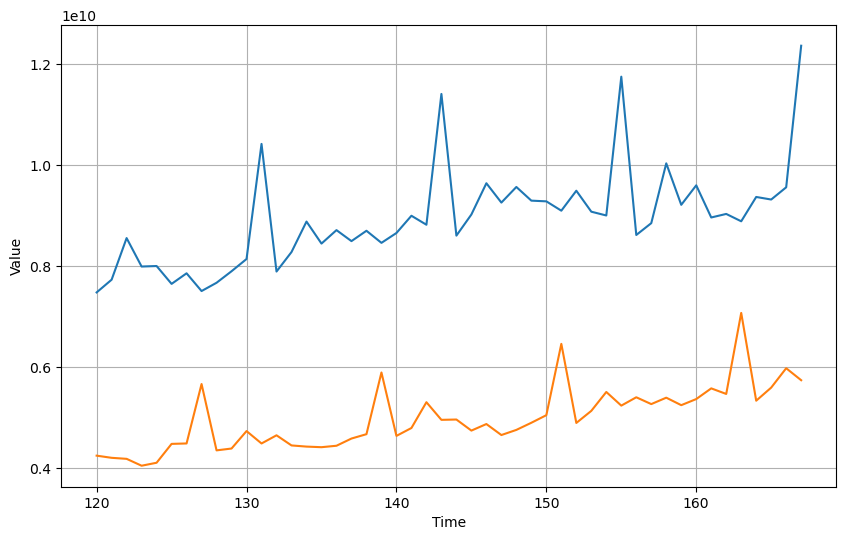

In [64]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [65]:
%%time
# 学習率の大まかなエリアを絞り込む
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss="mape", optimizer=optimizer)
history = model.fit(dataset, epochs=500, callbacks=[lr_schedule], verbose=0)

CPU times: user 1min 28s, sys: 9.86 s, total: 1min 37s
Wall time: 2min 13s


(1e-08, 0.001, 0.0, 300.0)

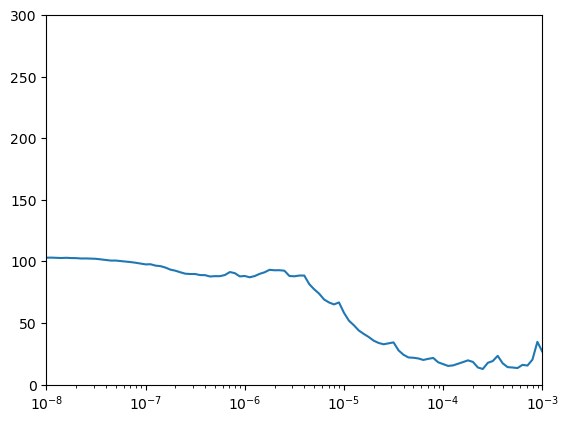

In [66]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs, history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [70]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=False, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 5s 88ms/step - loss: 83.9629
Epoch 2/500
5/5 [==============================] - 0s 47ms/step - loss: 46.1366
Epoch 3/500
5/5 [==============================] - 0s 16ms/step - loss: 54.2732
Epoch 4/500
5/5 [==============================] - 0s 21ms/step - loss: 28.9348
Epoch 5/500
5/5 [==============================] - 0s 38ms/step - loss: 32.5624
Epoch 6/500
5/5 [==============================] - 0s 21ms/step - loss: 17.6395
Epoch 7/500
5/5 [==============================] - 0s 24ms/step - loss: 14.6784
Epoch 8/500
5/5 [==============================] - 0s 15ms/step - loss: 15.5932
Epoch 9/500
5/5 [==============================] - 0s 29ms/step - loss: 22.2351
Epoch 10/500
5/5 [==============================] - 0s 23ms/step - loss: 15.4852
Epoch 11/500
5/5 [==============================] - 0s 23ms/step - loss: 18.0270
Epoch 12/500
5/5 [==============================] - 0s 24ms/step - loss: 11.3525
Epoch 13/500
5/5 [===================

Epoch 102/500
5/5 [==============================] - 0s 17ms/step - loss: 95.3991
Epoch 103/500
5/5 [==============================] - 0s 25ms/step - loss: 73.7325
Epoch 104/500
5/5 [==============================] - 0s 20ms/step - loss: 74.2029
Epoch 105/500
5/5 [==============================] - 0s 23ms/step - loss: 93.2864
Epoch 106/500
5/5 [==============================] - 0s 24ms/step - loss: 91.7271
Epoch 107/500
5/5 [==============================] - 0s 29ms/step - loss: 71.8422
Epoch 108/500
5/5 [==============================] - 0s 33ms/step - loss: 86.2940
Epoch 109/500
5/5 [==============================] - 0s 36ms/step - loss: 88.7972
Epoch 110/500
5/5 [==============================] - 0s 24ms/step - loss: 83.1213
Epoch 111/500
5/5 [==============================] - 0s 26ms/step - loss: 88.4204
Epoch 112/500
5/5 [==============================] - 0s 28ms/step - loss: 61.7996
Epoch 113/500
5/5 [==============================] - 0s 36ms/step - loss: 51.6737
Epoch 114/500
5/

5/5 [==============================] - 0s 28ms/step - loss: 70.2930
Epoch 202/500
5/5 [==============================] - 0s 24ms/step - loss: 65.1329
Epoch 203/500
5/5 [==============================] - 0s 29ms/step - loss: 41.2429
Epoch 204/500
5/5 [==============================] - 0s 27ms/step - loss: 52.7363
Epoch 205/500
5/5 [==============================] - 0s 19ms/step - loss: 53.8992
Epoch 206/500
5/5 [==============================] - 0s 26ms/step - loss: 68.8609
Epoch 207/500
5/5 [==============================] - 0s 23ms/step - loss: 53.6055
Epoch 208/500
5/5 [==============================] - 0s 24ms/step - loss: 57.0335
Epoch 209/500
5/5 [==============================] - 0s 28ms/step - loss: 42.6332
Epoch 210/500
5/5 [==============================] - 0s 25ms/step - loss: 50.0662
Epoch 211/500
5/5 [==============================] - 0s 19ms/step - loss: 49.9427
Epoch 212/500
5/5 [==============================] - 0s 25ms/step - loss: 44.2935
Epoch 213/500
5/5 [===========

5/5 [==============================] - 0s 21ms/step - loss: 33.6129
Epoch 302/500
5/5 [==============================] - 0s 30ms/step - loss: 33.5657
Epoch 303/500
5/5 [==============================] - 0s 25ms/step - loss: 35.2191
Epoch 304/500
5/5 [==============================] - 0s 22ms/step - loss: 32.3433
Epoch 305/500
5/5 [==============================] - 0s 27ms/step - loss: 28.3131
Epoch 306/500
5/5 [==============================] - 0s 28ms/step - loss: 41.3816
Epoch 307/500
5/5 [==============================] - 0s 26ms/step - loss: 30.6178
Epoch 308/500
5/5 [==============================] - 0s 30ms/step - loss: 29.4032
Epoch 309/500
5/5 [==============================] - 0s 25ms/step - loss: 26.1877
Epoch 310/500
5/5 [==============================] - 0s 30ms/step - loss: 37.8178
Epoch 311/500
5/5 [==============================] - 0s 23ms/step - loss: 27.0187
Epoch 312/500
5/5 [==============================] - 0s 26ms/step - loss: 26.1750
Epoch 313/500
5/5 [===========

5/5 [==============================] - 0s 27ms/step - loss: 24.9442
Epoch 402/500
5/5 [==============================] - 0s 33ms/step - loss: 24.9942
Epoch 403/500
5/5 [==============================] - 0s 34ms/step - loss: 23.7819
Epoch 404/500
5/5 [==============================] - 0s 21ms/step - loss: 22.9708
Epoch 405/500
5/5 [==============================] - 0s 25ms/step - loss: 23.6769
Epoch 406/500
5/5 [==============================] - 0s 18ms/step - loss: 26.6761
Epoch 407/500
5/5 [==============================] - 0s 22ms/step - loss: 25.3189
Epoch 408/500
5/5 [==============================] - 0s 26ms/step - loss: 27.6169
Epoch 409/500
5/5 [==============================] - 0s 28ms/step - loss: 23.7526
Epoch 410/500
5/5 [==============================] - 0s 30ms/step - loss: 22.2223
Epoch 411/500
5/5 [==============================] - 0s 24ms/step - loss: 28.1334
Epoch 412/500
5/5 [==============================] - 0s 26ms/step - loss: 29.6270
Epoch 413/500
5/5 [===========

1/1 [==============================] - 0s 38ms/step


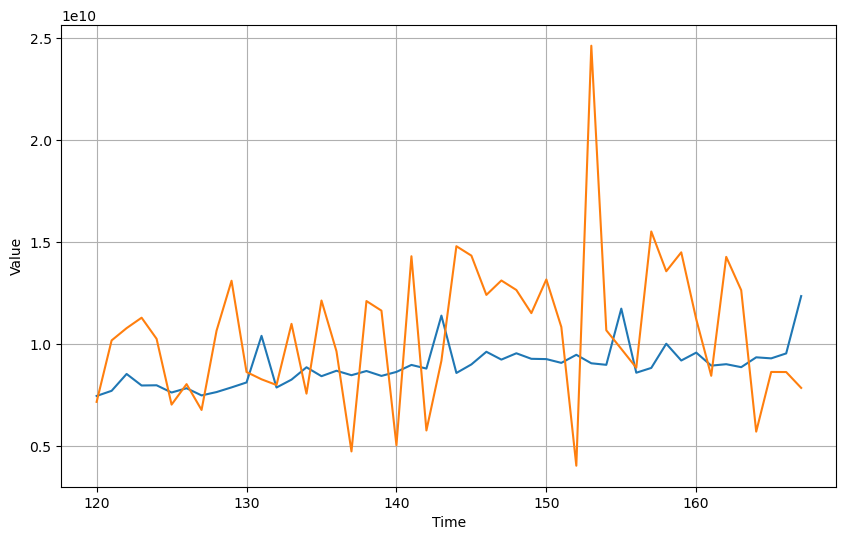

In [71]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [72]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 4s 27ms/step - loss: 93.9349
Epoch 2/500
5/5 [==============================] - 0s 16ms/step - loss: 86.6317
Epoch 3/500
5/5 [==============================] - 0s 24ms/step - loss: 67.3505
Epoch 4/500
5/5 [==============================] - 0s 17ms/step - loss: 48.3027
Epoch 5/500
5/5 [==============================] - 0s 25ms/step - loss: 33.8359
Epoch 6/500
5/5 [==============================] - 0s 32ms/step - loss: 34.8531
Epoch 7/500
5/5 [==============================] - 0s 33ms/step - loss: 31.1428
Epoch 8/500
5/5 [==============================] - 0s 28ms/step - loss: 32.3477
Epoch 9/500
5/5 [==============================] - 0s 26ms/step - loss: 32.3277
Epoch 10/500
5/5 [==============================] - 0s 35ms/step - loss: 31.0669
Epoch 11/500
5/5 [==============================] - 0s 29ms/step - loss: 28.2675
Epoch 12/500
5/5 [==============================] - 0s 33ms/step - loss: 24.8424
Epoch 13/500
5/5 [===================

5/5 [==============================] - 0s 32ms/step - loss: 17.7734
Epoch 103/500
5/5 [==============================] - 0s 30ms/step - loss: 19.3610
Epoch 104/500
5/5 [==============================] - 0s 17ms/step - loss: 15.8755
Epoch 105/500
5/5 [==============================] - 0s 33ms/step - loss: 14.0740
Epoch 106/500
5/5 [==============================] - 0s 26ms/step - loss: 13.7866
Epoch 107/500
5/5 [==============================] - 0s 15ms/step - loss: 15.0355
Epoch 108/500
5/5 [==============================] - 0s 26ms/step - loss: 15.7661
Epoch 109/500
5/5 [==============================] - 0s 28ms/step - loss: 14.5476
Epoch 110/500
5/5 [==============================] - 0s 29ms/step - loss: 14.0563
Epoch 111/500
5/5 [==============================] - 0s 16ms/step - loss: 13.7961
Epoch 112/500
5/5 [==============================] - 0s 25ms/step - loss: 16.3939
Epoch 113/500
5/5 [==============================] - 0s 27ms/step - loss: 17.3548
Epoch 114/500
5/5 [===========

5/5 [==============================] - 0s 29ms/step - loss: 8.6887
Epoch 203/500
5/5 [==============================] - 0s 15ms/step - loss: 8.7804
Epoch 204/500
5/5 [==============================] - 0s 25ms/step - loss: 8.1640
Epoch 205/500
5/5 [==============================] - 0s 22ms/step - loss: 8.1524
Epoch 206/500
5/5 [==============================] - 0s 32ms/step - loss: 8.2551
Epoch 207/500
5/5 [==============================] - 0s 42ms/step - loss: 8.8480
Epoch 208/500
5/5 [==============================] - 0s 33ms/step - loss: 8.3495
Epoch 209/500
5/5 [==============================] - 0s 26ms/step - loss: 7.9752
Epoch 210/500
5/5 [==============================] - 0s 23ms/step - loss: 8.3680
Epoch 211/500
5/5 [==============================] - 0s 25ms/step - loss: 8.7669
Epoch 212/500
5/5 [==============================] - 0s 25ms/step - loss: 8.4944
Epoch 213/500
5/5 [==============================] - 0s 26ms/step - loss: 8.6289
Epoch 214/500
5/5 [=======================

5/5 [==============================] - 0s 20ms/step - loss: 7.4590
Epoch 304/500
5/5 [==============================] - 0s 22ms/step - loss: 7.7015
Epoch 305/500
5/5 [==============================] - 0s 23ms/step - loss: 7.4750
Epoch 306/500
5/5 [==============================] - 0s 24ms/step - loss: 7.6844
Epoch 307/500
5/5 [==============================] - 0s 40ms/step - loss: 7.6724
Epoch 308/500
5/5 [==============================] - 0s 17ms/step - loss: 7.8121
Epoch 309/500
5/5 [==============================] - 0s 23ms/step - loss: 7.6907
Epoch 310/500
5/5 [==============================] - 0s 22ms/step - loss: 7.4649
Epoch 311/500
5/5 [==============================] - 0s 30ms/step - loss: 7.3802
Epoch 312/500
5/5 [==============================] - 0s 22ms/step - loss: 7.3369
Epoch 313/500
5/5 [==============================] - 0s 31ms/step - loss: 7.3447
Epoch 314/500
5/5 [==============================] - 0s 29ms/step - loss: 7.6004
Epoch 315/500
5/5 [=======================

5/5 [==============================] - 0s 23ms/step - loss: 7.1376
Epoch 405/500
5/5 [==============================] - 0s 24ms/step - loss: 7.2163
Epoch 406/500
5/5 [==============================] - 0s 21ms/step - loss: 7.2120
Epoch 407/500
5/5 [==============================] - 0s 25ms/step - loss: 7.1572
Epoch 408/500
5/5 [==============================] - 0s 27ms/step - loss: 7.2414
Epoch 409/500
5/5 [==============================] - 0s 23ms/step - loss: 7.5887
Epoch 410/500
5/5 [==============================] - 0s 23ms/step - loss: 7.3409
Epoch 411/500
5/5 [==============================] - 0s 24ms/step - loss: 7.1042
Epoch 412/500
5/5 [==============================] - 0s 33ms/step - loss: 7.1205
Epoch 413/500
5/5 [==============================] - 0s 25ms/step - loss: 7.5282
Epoch 414/500
5/5 [==============================] - 0s 22ms/step - loss: 7.3149
Epoch 415/500
5/5 [==============================] - 0s 24ms/step - loss: 7.5744
Epoch 416/500
5/5 [=======================

1/1 [==============================] - 0s 48ms/step


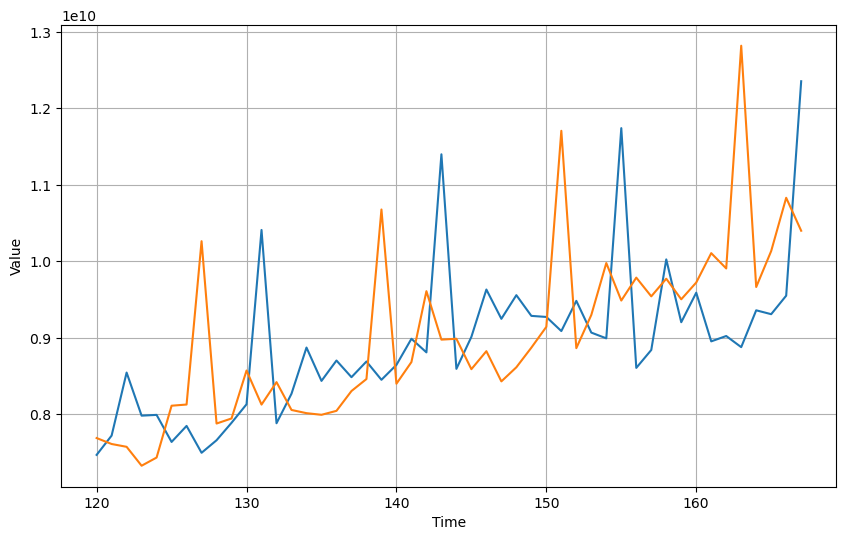

In [73]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [75]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 2s 23ms/step - loss: 73.6426
Epoch 2/500
5/5 [==============================] - 0s 27ms/step - loss: 50.3898
Epoch 3/500
5/5 [==============================] - 0s 17ms/step - loss: 43.9282
Epoch 4/500
5/5 [==============================] - 0s 30ms/step - loss: 36.6375
Epoch 5/500
5/5 [==============================] - 0s 27ms/step - loss: 30.2974
Epoch 6/500
5/5 [==============================] - 0s 24ms/step - loss: 28.2508
Epoch 7/500
5/5 [==============================] - 0s 19ms/step - loss: 28.8417
Epoch 8/500
5/5 [==============================] - 0s 28ms/step - loss: 28.7010
Epoch 9/500
5/5 [==============================] - 0s 28ms/step - loss: 25.1454
Epoch 10/500
5/5 [==============================] - 0s 27ms/step - loss: 22.9567
Epoch 11/500
5/5 [==============================] - 0s 24ms/step - loss: 20.7584
Epoch 12/500
5/5 [==============================] - 0s 35ms/step - loss: 18.4250
Epoch 13/500
5/5 [===================

Epoch 106/500
5/5 [==============================] - 0s 15ms/step - loss: nan
Epoch 107/500
5/5 [==============================] - 0s 39ms/step - loss: nan
Epoch 108/500
5/5 [==============================] - 0s 35ms/step - loss: nan
Epoch 109/500
5/5 [==============================] - 0s 19ms/step - loss: nan
Epoch 110/500
5/5 [==============================] - 0s 32ms/step - loss: nan
Epoch 111/500
5/5 [==============================] - 0s 18ms/step - loss: nan
Epoch 112/500
5/5 [==============================] - 0s 30ms/step - loss: nan
Epoch 113/500
5/5 [==============================] - 0s 26ms/step - loss: nan
Epoch 114/500
5/5 [==============================] - 0s 27ms/step - loss: nan
Epoch 115/500
5/5 [==============================] - 0s 21ms/step - loss: nan
Epoch 116/500
5/5 [==============================] - 0s 26ms/step - loss: nan
Epoch 117/500
5/5 [==============================] - 0s 28ms/step - loss: nan
Epoch 118/500
5/5 [==============================] - 0s 23ms/ste

5/5 [==============================] - 0s 27ms/step - loss: nan
Epoch 212/500
5/5 [==============================] - 0s 28ms/step - loss: nan
Epoch 213/500
5/5 [==============================] - 0s 17ms/step - loss: nan
Epoch 214/500
5/5 [==============================] - 0s 28ms/step - loss: nan
Epoch 215/500
5/5 [==============================] - 0s 30ms/step - loss: nan
Epoch 216/500
5/5 [==============================] - 0s 19ms/step - loss: nan
Epoch 217/500
5/5 [==============================] - 0s 28ms/step - loss: nan
Epoch 218/500
5/5 [==============================] - 0s 33ms/step - loss: nan
Epoch 219/500
5/5 [==============================] - 0s 27ms/step - loss: nan
Epoch 220/500
5/5 [==============================] - 0s 21ms/step - loss: nan
Epoch 221/500
5/5 [==============================] - 0s 26ms/step - loss: nan
Epoch 222/500
5/5 [==============================] - 0s 18ms/step - loss: nan
Epoch 223/500
5/5 [==============================] - 0s 26ms/step - loss: nan


5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 317/500
5/5 [==============================] - 0s 27ms/step - loss: nan
Epoch 318/500
5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 319/500
5/5 [==============================] - 0s 24ms/step - loss: nan
Epoch 320/500
5/5 [==============================] - 0s 24ms/step - loss: nan
Epoch 321/500
5/5 [==============================] - 0s 20ms/step - loss: nan
Epoch 322/500
5/5 [==============================] - 0s 23ms/step - loss: nan
Epoch 323/500
5/5 [==============================] - 0s 30ms/step - loss: nan
Epoch 324/500
5/5 [==============================] - 0s 25ms/step - loss: nan
Epoch 325/500
5/5 [==============================] - 0s 22ms/step - loss: nan
Epoch 326/500
5/5 [==============================] - 0s 22ms/step - loss: nan
Epoch 327/500
5/5 [==============================] - 0s 22ms/step - loss: nan
Epoch 328/500
5/5 [==============================] - 0s 28ms/step - loss: nan


5/5 [==============================] - 0s 24ms/step - loss: nan
Epoch 422/500
5/5 [==============================] - 0s 30ms/step - loss: nan
Epoch 423/500
5/5 [==============================] - 0s 20ms/step - loss: nan
Epoch 424/500
5/5 [==============================] - 0s 27ms/step - loss: nan
Epoch 425/500
5/5 [==============================] - 0s 20ms/step - loss: nan
Epoch 426/500
5/5 [==============================] - 0s 26ms/step - loss: nan
Epoch 427/500
5/5 [==============================] - 0s 23ms/step - loss: nan
Epoch 428/500
5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 429/500
5/5 [==============================] - 0s 26ms/step - loss: nan
Epoch 430/500
5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 431/500
5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 432/500
5/5 [==============================] - 0s 29ms/step - loss: nan
Epoch 433/500
5/5 [==============================] - 0s 26ms/step - loss: nan


1/1 [==============================] - 0s 99ms/step


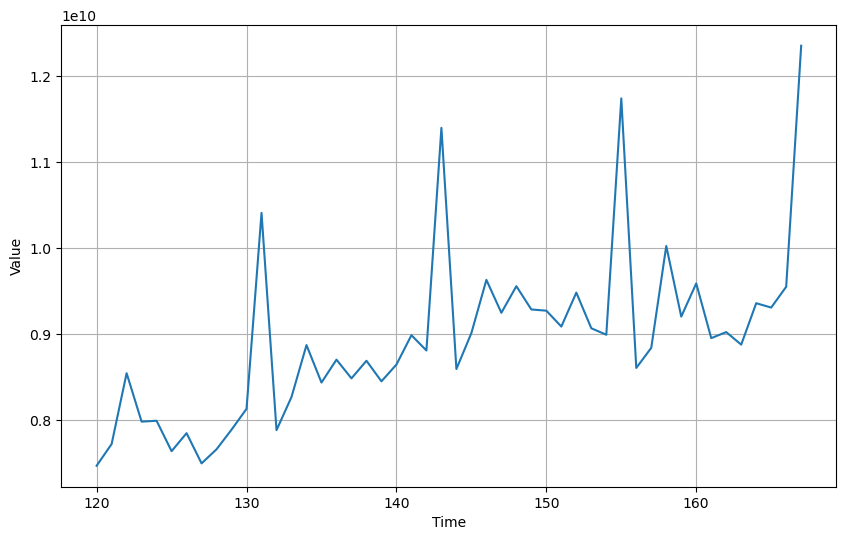

In [76]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [77]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 3s 42ms/step - loss: 112.9027
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 92.9802
Epoch 3/500
5/5 [==============================] - 0s 24ms/step - loss: 68.6744
Epoch 4/500
5/5 [==============================] - 0s 16ms/step - loss: 43.5334
Epoch 5/500
5/5 [==============================] - 0s 25ms/step - loss: 39.6835
Epoch 6/500
5/5 [==============================] - 0s 21ms/step - loss: 36.5102
Epoch 7/500
5/5 [==============================] - 0s 34ms/step - loss: 34.9765
Epoch 8/500
5/5 [==============================] - 0s 32ms/step - loss: 34.3611
Epoch 9/500
5/5 [==============================] - 0s 29ms/step - loss: 33.2146
Epoch 10/500
5/5 [==============================] - 0s 28ms/step - loss: 31.0074
Epoch 11/500
5/5 [==============================] - 0s 33ms/step - loss: 30.1384
Epoch 12/500
5/5 [==============================] - 0s 29ms/step - loss: 28.7530
Epoch 13/500
5/5 [==================

5/5 [==============================] - 0s 33ms/step - loss: 9.4595
Epoch 103/500
5/5 [==============================] - 0s 14ms/step - loss: 9.1732
Epoch 104/500
5/5 [==============================] - 0s 14ms/step - loss: 9.1390
Epoch 105/500
5/5 [==============================] - 0s 22ms/step - loss: 9.3318
Epoch 106/500
5/5 [==============================] - 0s 20ms/step - loss: 8.9578
Epoch 107/500
5/5 [==============================] - 0s 22ms/step - loss: 8.9871
Epoch 108/500
5/5 [==============================] - 0s 21ms/step - loss: 9.1294
Epoch 109/500
5/5 [==============================] - 0s 30ms/step - loss: 9.2738
Epoch 110/500
5/5 [==============================] - 0s 16ms/step - loss: 9.1296
Epoch 111/500
5/5 [==============================] - 0s 24ms/step - loss: 8.9913
Epoch 112/500
5/5 [==============================] - 0s 20ms/step - loss: 8.8050
Epoch 113/500
5/5 [==============================] - 0s 24ms/step - loss: 8.8798
Epoch 114/500
5/5 [=======================

5/5 [==============================] - 0s 27ms/step - loss: 7.9391
Epoch 204/500
5/5 [==============================] - 0s 22ms/step - loss: 7.9192
Epoch 205/500
5/5 [==============================] - 0s 20ms/step - loss: 7.9507
Epoch 206/500
5/5 [==============================] - 0s 26ms/step - loss: 7.9456
Epoch 207/500
5/5 [==============================] - 0s 32ms/step - loss: 8.2497
Epoch 208/500
5/5 [==============================] - 0s 36ms/step - loss: 7.8837
Epoch 209/500
5/5 [==============================] - 0s 32ms/step - loss: 8.0163
Epoch 210/500
5/5 [==============================] - 0s 30ms/step - loss: 7.6849
Epoch 211/500
5/5 [==============================] - 0s 30ms/step - loss: 7.9715
Epoch 212/500
5/5 [==============================] - 0s 26ms/step - loss: 8.2449
Epoch 213/500
5/5 [==============================] - 0s 28ms/step - loss: 8.1461
Epoch 214/500
5/5 [==============================] - 0s 27ms/step - loss: 8.0357
Epoch 215/500
5/5 [=======================

5/5 [==============================] - 0s 24ms/step - loss: 8.4087
Epoch 305/500
5/5 [==============================] - 0s 24ms/step - loss: 8.0404
Epoch 306/500
5/5 [==============================] - 0s 28ms/step - loss: 8.1823
Epoch 307/500
5/5 [==============================] - 0s 28ms/step - loss: 7.8917
Epoch 308/500
5/5 [==============================] - 0s 19ms/step - loss: 8.6180
Epoch 309/500
5/5 [==============================] - 0s 24ms/step - loss: 8.0823
Epoch 310/500
5/5 [==============================] - 0s 23ms/step - loss: 8.1885
Epoch 311/500
5/5 [==============================] - 0s 23ms/step - loss: 8.1289
Epoch 312/500
5/5 [==============================] - 0s 27ms/step - loss: 7.9800
Epoch 313/500
5/5 [==============================] - 0s 23ms/step - loss: 8.4076
Epoch 314/500
5/5 [==============================] - 0s 29ms/step - loss: 8.5480
Epoch 315/500
5/5 [==============================] - 0s 28ms/step - loss: 8.4929
Epoch 316/500
5/5 [=======================

5/5 [==============================] - 0s 30ms/step - loss: 7.9160
Epoch 406/500
5/5 [==============================] - 0s 35ms/step - loss: 8.3419
Epoch 407/500
5/5 [==============================] - 0s 24ms/step - loss: 8.2371
Epoch 408/500
5/5 [==============================] - 0s 17ms/step - loss: 8.6156
Epoch 409/500
5/5 [==============================] - 0s 23ms/step - loss: 8.5855
Epoch 410/500
5/5 [==============================] - 0s 25ms/step - loss: 8.1698
Epoch 411/500
5/5 [==============================] - 0s 24ms/step - loss: 8.4417
Epoch 412/500
5/5 [==============================] - 0s 29ms/step - loss: 8.4552
Epoch 413/500
5/5 [==============================] - 0s 30ms/step - loss: 8.5625
Epoch 414/500
5/5 [==============================] - 0s 23ms/step - loss: 9.1274
Epoch 415/500
5/5 [==============================] - 0s 23ms/step - loss: 8.4375
Epoch 416/500
5/5 [==============================] - 0s 28ms/step - loss: 8.4181
Epoch 417/500
5/5 [=======================

1/1 [==============================] - 0s 38ms/step


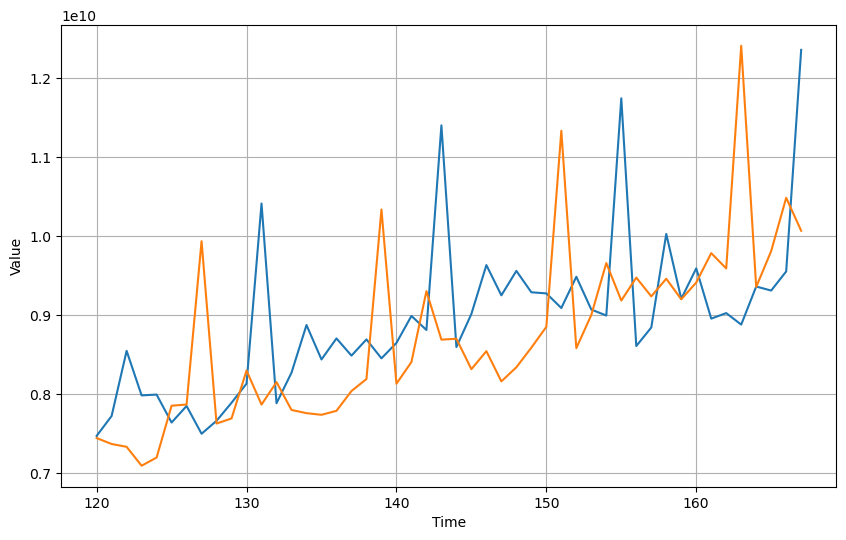

In [78]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)

In [80]:
%%time
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = Sequential()
model.add(LSTM(100, input_shape=[None, 1], return_sequences=True, activation='relu'))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss="mape", optimizer=tf.keras.optimizers.SGD(lr=1e-4, momentum=0.5))
model.fit(dataset, epochs=500,  verbose=1)

Epoch 1/500
5/5 [==============================] - 3s 27ms/step - loss: 78.4885
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 44.2379
Epoch 3/500
5/5 [==============================] - 0s 26ms/step - loss: 34.9560
Epoch 4/500
5/5 [==============================] - 0s 26ms/step - loss: 37.0291
Epoch 5/500
5/5 [==============================] - 0s 21ms/step - loss: 35.3109
Epoch 6/500
5/5 [==============================] - 0s 30ms/step - loss: 29.9957
Epoch 7/500
5/5 [==============================] - 0s 25ms/step - loss: 24.5389
Epoch 8/500
5/5 [==============================] - 0s 24ms/step - loss: 19.7374
Epoch 9/500
5/5 [==============================] - 0s 23ms/step - loss: 19.2713
Epoch 10/500
5/5 [==============================] - 0s 27ms/step - loss: 18.7679
Epoch 11/500
5/5 [==============================] - 0s 32ms/step - loss: 18.8798
Epoch 12/500
5/5 [==============================] - 0s 25ms/step - loss: 20.4872
Epoch 13/500
5/5 [===================

5/5 [==============================] - 0s 19ms/step - loss: 10.6324
Epoch 103/500
5/5 [==============================] - 0s 23ms/step - loss: 9.9062
Epoch 104/500
5/5 [==============================] - 0s 22ms/step - loss: 9.4872
Epoch 105/500
5/5 [==============================] - 0s 21ms/step - loss: 9.5218
Epoch 106/500
5/5 [==============================] - 0s 20ms/step - loss: 10.1184
Epoch 107/500
5/5 [==============================] - 0s 21ms/step - loss: 9.4696
Epoch 108/500
5/5 [==============================] - 0s 17ms/step - loss: 10.2036
Epoch 109/500
5/5 [==============================] - 0s 18ms/step - loss: 9.3638
Epoch 110/500
5/5 [==============================] - 0s 20ms/step - loss: 9.9176
Epoch 111/500
5/5 [==============================] - 0s 21ms/step - loss: 9.5419
Epoch 112/500
5/5 [==============================] - 0s 28ms/step - loss: 9.0343
Epoch 113/500
5/5 [==============================] - 0s 35ms/step - loss: 9.6728
Epoch 114/500
5/5 [====================

5/5 [==============================] - 0s 25ms/step - loss: 8.9445
Epoch 204/500
5/5 [==============================] - 0s 31ms/step - loss: 8.6189
Epoch 205/500
5/5 [==============================] - 0s 33ms/step - loss: 8.7054
Epoch 206/500
5/5 [==============================] - 0s 47ms/step - loss: 8.3792
Epoch 207/500
5/5 [==============================] - 0s 21ms/step - loss: 8.8152
Epoch 208/500
5/5 [==============================] - 0s 21ms/step - loss: 8.3842
Epoch 209/500
5/5 [==============================] - 0s 24ms/step - loss: 8.9934
Epoch 210/500
5/5 [==============================] - 0s 22ms/step - loss: 8.8146
Epoch 211/500
5/5 [==============================] - 0s 23ms/step - loss: 8.2389
Epoch 212/500
5/5 [==============================] - 0s 34ms/step - loss: 8.5596
Epoch 213/500
5/5 [==============================] - 0s 24ms/step - loss: 8.1419
Epoch 214/500
5/5 [==============================] - 0s 24ms/step - loss: 7.8876
Epoch 215/500
5/5 [=======================

5/5 [==============================] - 0s 24ms/step - loss: 8.7303
Epoch 305/500
5/5 [==============================] - 0s 26ms/step - loss: 8.7495
Epoch 306/500
5/5 [==============================] - 0s 18ms/step - loss: 8.4746
Epoch 307/500
5/5 [==============================] - 0s 22ms/step - loss: 8.2387
Epoch 308/500
5/5 [==============================] - 0s 23ms/step - loss: 8.2250
Epoch 309/500
5/5 [==============================] - 0s 23ms/step - loss: 8.3727
Epoch 310/500
5/5 [==============================] - 0s 19ms/step - loss: 8.6772
Epoch 311/500
5/5 [==============================] - 0s 22ms/step - loss: 8.1198
Epoch 312/500
5/5 [==============================] - 0s 13ms/step - loss: 8.7492
Epoch 313/500
5/5 [==============================] - 0s 28ms/step - loss: 8.7692
Epoch 314/500
5/5 [==============================] - 0s 23ms/step - loss: 8.3876
Epoch 315/500
5/5 [==============================] - 0s 22ms/step - loss: 8.0031
Epoch 316/500
5/5 [=======================

5/5 [==============================] - 0s 21ms/step - loss: 7.6115
Epoch 406/500
5/5 [==============================] - 0s 19ms/step - loss: 8.0723
Epoch 407/500
5/5 [==============================] - 0s 25ms/step - loss: 7.9389
Epoch 408/500
5/5 [==============================] - 0s 31ms/step - loss: 8.1921
Epoch 409/500
5/5 [==============================] - 0s 25ms/step - loss: 7.7725
Epoch 410/500
5/5 [==============================] - 0s 22ms/step - loss: 7.9588
Epoch 411/500
5/5 [==============================] - 0s 22ms/step - loss: 7.5331
Epoch 412/500
5/5 [==============================] - 0s 28ms/step - loss: 8.5671
Epoch 413/500
5/5 [==============================] - 0s 18ms/step - loss: 7.6550
Epoch 414/500
5/5 [==============================] - 0s 29ms/step - loss: 7.7260
Epoch 415/500
5/5 [==============================] - 0s 28ms/step - loss: 7.7411
Epoch 416/500
5/5 [==============================] - 0s 22ms/step - loss: 7.9521
Epoch 417/500
5/5 [=======================

1/1 [==============================] - 0s 34ms/step


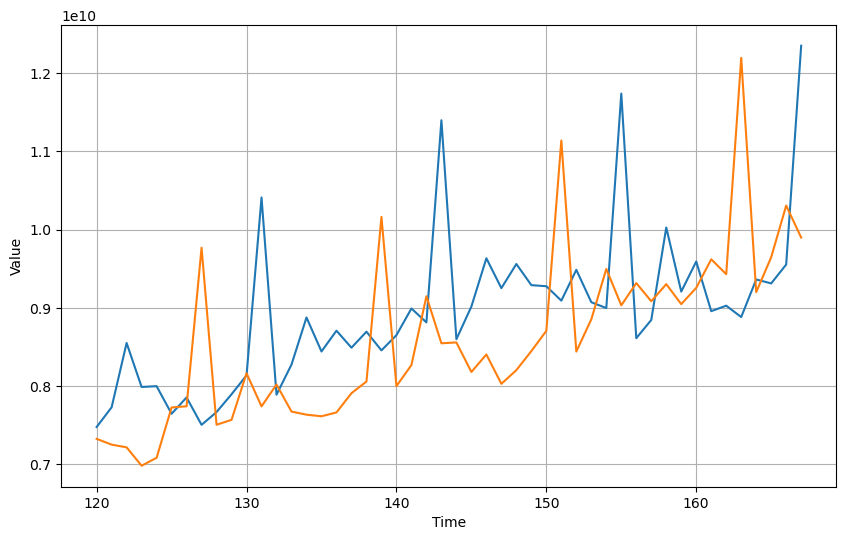

In [81]:
forecast = []
for time in range(168 - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

train_pred = np.array(forecast[:split_time-window_size])[:, 0, 0]
test_pred = np.array(forecast[split_time-window_size:])[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, test_pred)